---
# Tendências e Padrões na Compra de Seguros de Veículos
---
# SME0878 - Mineração Estatística de Dados - Trabalho 3

Integrantes:
* Heitor Carvalho Pinheiro
* Matheus Vinícius Barreto de Farias

# 1. Introdução

A indústria de seguros automotivos desempenha um papel crucial na proteção financeira e segurança dos proprietários de veículos, oferecendo cobertura contra uma variedade de riscos, desde acidentes de trânsito até danos causados por eventos naturais. Compreender os padrões e tendências relacionados à compra de seguros de veículos é fundamental para as companhias de seguros, permitindo-lhes adaptar suas estratégias de precificação, marketing e gestão de riscos.

Este relatório apresenta uma análise detalhada da compra de seguros de veículos com base no conjunto de dados disponibilizado. O objetivo principal é investigar os principais fatores que influenciam as decisões de compra de seguros automotivos pelos consumidores. Para alcançar esse objetivo, exploramos uma variedade de variáveis relacionadas ao perfil do comprador.

Ao longo deste relatório, utilizamos técnicas de análise de dados estatísticos e visualização para identificar correlações, tendências e insights significativos que podem orientar as estratégias de negócios das seguradoras. Visamos ainda a análise de diferentes modelos de regressão binária e classificação a fim de definir aquele que melhor se ajusta aos dados apresentados.

A compreensão aprofundada dos padrões de compra de seguros de veículos não apenas beneficia as companhias de seguros na otimização de seus produtos e serviços, mas também fornece informações valiosas aos consumidores, permitindo-lhes tomar decisões mais informadas sobre suas necessidades de proteção veicular.

A seguir, apresentamos um plano de análise com as etapas planejadas para o nosso processo investigativo. A seção 2 apresenta a descrição dos dados, a descrição das bibliotecas utilizadas, uma análise das distribuições das variáveis consideradas no estudo, busca por outliers, análise de segmentação e outras considerações a respeito da futura modelagem dos dados. Ao longo da seção 3, ajustamos diversos modelos afim de predizer a classe das observações de um conjunto de teste. A seção 4 apresenta a conclusão do relatório, com recomendações elaboradas a partir das análises realizadas ao longo do estudo e sugestões de próximos passos.

## Plano de análise:
* Entendimento dos Dados:
 - Explorar a estrutura do conjunto de dados, identificando o número de observações, variáveis e tipos de dados.
 - Verificar a presença de valores ausentes, outliers e inconsistências nos dados.

* Análise Descritiva:
 - Realizar uma análise descritiva das variáveis relacionadas ao perfil do segurado.
 - Calcular estatísticas resumidas, como média, mediana, desvio padrão e quartis, para compreender a distribuição das variáveis.
 - Investigar padrões de compra de seguros de veículos em diferentes segmentos demográficos e tipos de veículos.

* Análise de Correlação:
 - Avaliar a correlação entre variáveis, utilizando técnicas estatísticas como correlação de Pearson e de Spearman.
 - Identificar quais características do  perfil do segurado têm maior influência na decisão de compra de seguros de veículos.

* Visualização de Dados:
 - Criar gráficos para comunicar insights de forma clara e eficaz.
 - Utilizar histogramas, boxplots e mapas de calor para destacar padrões e relações entre variáveis.

* Análise Comparativa:
 - Comparar os padrões de compra de seguros de veículos entre diferentes perfis.
 - Identificar diferenças significativas e insights relevantes que possam orientar as estratégias de marketing e precificação das seguradoras.

* Conclusões e Recomendações:
 - Resumir as principais descobertas obtidas durante a análise.
 - Fornecer recomendações acionáveis para as companhias de seguros com base nos resultados encontrados.
 - Discutir possíveis áreas de pesquisa futura e aprimoramento da análise.

# 2. Exploração dos dados

## Descrição dos dados:
A seção 5 de Bazan et al., 2017 descreve o conjunto de dados a ser utilizado. Em resumo, temos 4000 observações de 6 variáveis, sendo elas:

* y: indica se houve ou não a compra do seguro completo, assume valores no conjunto {0: não houve compra do seguro completo, 1: houve compra do seguro completo}
* MEN: indica se o motorista é homem ou mulher, assume valores no conjunto {0: mulher, 1: homem}
* URBAN: indica se o veículo é conduzido em ambiente urbano ou rural, assume valores no conjunto {0: rural, 1: urbano}
* PRIVATE: indica se o veículo é particular ou não, assume valores no conjunto {0: não particular, 1: particular}
* AGE: idade do motorista, assume valores no conjunto dos inteiros positivos
* SENIORITY: anos de habilitação do motorista, assume valores no conjunto dos inteiros positivos

## Leitura das bibliotecas e da base de dados

A seguir, temos uma breve descrição das bibliotecas utilizadas:
* Pandas (McKinney et al., 2010): leitura e manipulação de bases de dados
* NumPy (Harris, 2020): computação numérica
* Matplotlib (Hunter, 2007): visualização de dados
* Seaborn (Waskom, 2021): baseada na Matplotlib, essa biblioteca oferece opções de mais alto nível para a construção de gráficos
* Sklearn (Pedregosa et al.): biblioteca com um conjunto de modelos de aprendizado de máquina, que oferece também métricas de avaliação e outras funções de utilidade.
* Statsmodels (Seabold & Perktold, 2010): contém diversos modelos relacionados à modelagem estatística frequentista
* PyStan (Riddell et al, 2021): Implementação do algoritmo Stan para amostragem bayesiana.
* PyBCOPS (disponível em https://github.com/mvbdf/PyBCOPS/tree/main): uma adaptação do código de Guan, L. & Tibshirani, R. (2022) para Python escrita por Matheus Vinícius Barreto de Farias. É utilizada na detecção de observações atípicas.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.metrics import mutual_info_score

import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import chi2_contingency

import PyBCOPS as pb

pd.set_option('display.max_columns', 500)

np.random.seed(123)

In [2]:
def complete_plot_roc(y_true, y_probs, ax, threshold_step=0.1):

    """
    Calcula a curva ROC completa para o modelo
    """

    from sklearn.metrics import roc_curve, roc_auc_score
    from matplotlib.cm import viridis as mycolormap

    fpr, tpr, thresh = roc_curve(y_true, y_probs)

    # x axis, y axis
    x = fpr
    y = tpr

    auc = roc_auc_score(y_true, y_probs)

    # color
    c = thresh
    c[0] = c[0]-1
    c = (c - c.min())/(c.max() - c.min())

    base = 1.0 - threshold_step
    for i in range(len(x)):
        ax.plot(x[i:i+2], y[i:i+2], c=mycolormap(c[i]))

        if thresh[i] <= base:
            ax.scatter(x[i], y[i], color=mycolormap(c[i]))
            ax.annotate("  {0:.1f}".format(thresh[i]), (x[i]*1.03, y[i]*0.96), fontsize=8)
            base -= threshold_step

    ax.annotate("AUC = {0:.2f}".format(auc), (0.77, 0.01), fontsize=8,
               bbox=dict(facecolor='none', edgecolor='black', pad=5.0))
    ax.set_xlabel("FPR")
    ax.set_ylabel("TPR")

    return

In [ ]:
# para ler a base de dados, utilizamos a função read_csv, passando como parâmetro o nome do arquivo e, no caso de arquivos csv, o caractér usado para separar as colunas
df = pd.read_csv('../data/coverageX.txt', sep='\t')
df

: 

## Análise das distribuições e busca por inconssistências na base de dados

Nosso objetivo é levantar as primeiras informações sobre as variáveis presentes no estudo. Para isso, trazemos estatísticas descritivas (média, moda, 1º, 2º e 3º quartis, minímo e máximo -- estatísticas padrão do método describe para dataframes da biblioteca Pandas) para cada coluna da base de dados. Também análisamos as distribuições das variáveis numéricas AGE e SENIORITY, e passamos à busca por inconssistências presentes nessas variáveis.

In [4]:
# a variável dtypes informa os tipos das colunas presentes na base de dados
df.dtypes

y            int64
MEN          int64
URBAN        int64
PRIVATE      int64
AGE          int64
SENIORITY    int64
dtype: object

In [5]:
# o método isna() transforma o dataframe, de modo que para cada célular é indicado se seu valor é faltante
# em seguida, o método sum() realiza a soma das colunas, de modo que o resultado é o número de valores faltantes por coluna
df.isna().sum()

y            0
MEN          0
URBAN        0
PRIVATE      0
AGE          0
SENIORITY    0
dtype: int64

O conjunto de dados não possui valores faltantes.

In [6]:
# o método describe é bastante utilizando ao longo do relatório pois ele fornece estatísticas relevantes de maneira prática
df.describe()

,y,MEN,URBAN,PRIVATE,AGE,SENIORITY
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,0.346750,0.752500,0.345750,0.990250,46.474000,10.87675
std,0.475995,0.431614,0.475672,0.098272,13.421451,6.64493
min,0.000000,0.000000,0.000000,0.000000,15.000000,2.00000
25%,0.000000,1.000000,0.000000,1.000000,36.000000,5.00000
50%,0.000000,1.000000,0.000000,1.000000,45.000000,10.00000
75%,1.000000,1.000000,1.000000,1.000000,56.000000,15.00000
max,1.000000,1.000000,1.000000,1.000000,92.000000,40.00000


Podemos notar que em $34.6750\%$ das observações houve acionamento do seguro. Além disso, $75.2500\%$ dos condutores no conjunto são homens; $34.5750\%$ dirigem em ambiente urbano; e $99.0250\%$ se tratam de veículos privados. Em média, o condutor possui $46.474000$ anos de idade e $10.87675$ anos como motorista. Abaixo temos os histogramas das variáveis AGE e SENIORITY, respectivamente:

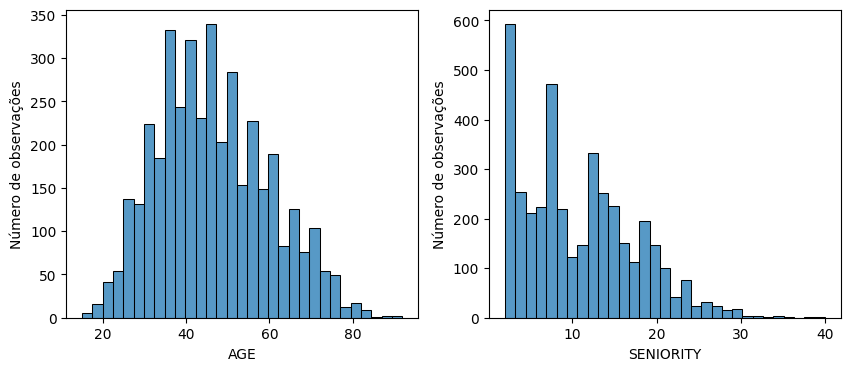

In [7]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='AGE')
plt.ylabel('Número de observações')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='SENIORITY')
plt.ylabel('Número de observações');

Também podemos observar as distribuições das variáveis AGE e SENIORITY por meio do gráfico boxplot.

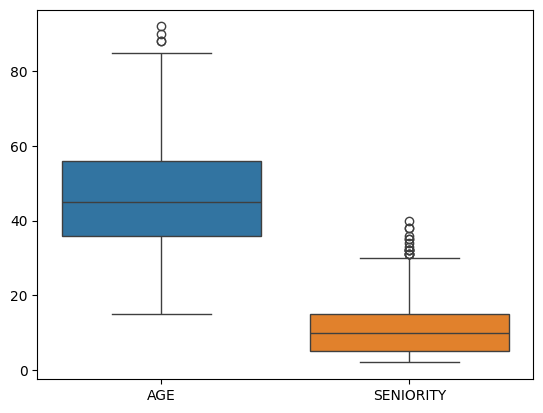

In [8]:
sns.boxplot(df[['AGE', 'SENIORITY']]);

Podemos notar a presença de outliers do lado direito da distribuição dessas variáveis. Note que a documentação da biblioteca seaborn indica que os outliers são detectados a partir de uma função da distância inter-quartil (mais em https://seaborn.pydata.org/generated/seaborn.boxplot.html), de modo que estamos assumindo simetria na distribuição dessas variáveis. Passamos a verificar os valores presentes nas pontas das distribuições dessas variáveis.

In [9]:
df.sort_values('AGE').head(10)

,y,MEN,URBAN,PRIVATE,AGE,SENIORITY
3869,0,1,0,0,15,2
3550,0,1,0,1,15,3
3455,0,1,0,1,16,3
3829,0,1,0,1,17,2
3926,1,1,1,1,17,2
3228,0,1,1,1,18,6
3735,0,1,0,1,18,2
3932,1,1,0,1,18,2
3316,0,1,0,1,18,4
3572,0,0,1,1,18,3


Notamos que existem 5 observações de clientes cuja idade é menor do que 18 anos (considerada idade legal para dirigir na Espanha, país de origem desse conjunto de dados). Agora, em relação as observações mais à direita da distribuição:

In [10]:
df.sort_values('AGE').tail(10)

,y,MEN,URBAN,PRIVATE,AGE,SENIORITY
560,0,1,0,1,83,21
561,0,1,0,1,83,11
2747,0,1,0,1,83,19
1339,0,1,0,1,84,14
1449,0,1,1,1,84,15
130,1,1,0,1,85,35
343,0,1,0,1,88,24
2115,0,1,1,1,88,18
1803,0,1,0,1,90,18
1133,0,1,1,1,92,16


Apesar das idades elevadas, nada indica que essas entradas no conjunto de dados configuram erros de anotação. Passamos a análise da variável SENIORITY. Dada a alta concentração dos dados à esquerda da distribuição, verificamos primeiramente sua distribuição empirica por meio da seguinte tabela:

In [11]:
df.sort_values('SENIORITY').SENIORITY.value_counts(sort=False)

SENIORITY
2     299
3     293
4     254
5     211
6     223
7     255
8     216
9     219
10    122
11    147
12    147
13    185
14    252
15    226
16    150
17    113
18    102
19     94
20    146
21    100
22     42
23     44
24     32
25     24
26     31
27     23
28     16
29     10
30      8
31      4
32      4
33      1
34      1
35      2
36      1
38      2
40      1
Name: count, dtype: int64

In [12]:
df.sort_values('SENIORITY').tail(10)

,y,MEN,URBAN,PRIVATE,AGE,SENIORITY
1849,0,1,0,1,51,32
0,0,1,1,1,58,32
604,0,1,0,1,71,33
2269,1,1,0,1,33,34
2066,1,1,0,1,63,35
130,1,1,0,1,85,35
1990,0,1,0,1,62,36
235,0,1,0,1,70,38
3539,0,1,0,1,65,38
908,0,1,0,1,41,40


Podemos notar que há o caso de um motorista que possui 41 anos e 40 de habilitado. Para aprofundar nossa análise, criaremos uma variável auxiliar chamada idade_habilitacao, que indica a idade do motorista no momento que este foi habilitado a dirigir. Assim,
$$idade\_habilitacao = AGE - SENIORITY$$

In [13]:
df['idade_habilitacao'] = df['AGE'] - df['SENIORITY']

In [14]:
df.idade_habilitacao.describe()

count    4000.000000
mean       35.597250
std        12.668452
min        -1.000000
25%        26.000000
50%        33.000000
75%        44.000000
max        78.000000
Name: idade_habilitacao, dtype: float64

Podemos notar logo que há um problema no caso em que a idade em que o motorista foi habilitado assume um valor negativo.

In [15]:
df.query('idade_habilitacao < 18')

,y,MEN,URBAN,PRIVATE,AGE,SENIORITY,idade_habilitacao
1,1,1,0,1,37,30,7
39,1,1,0,1,43,26,17
153,0,0,0,1,30,19,11
172,1,1,0,1,32,17,15
230,1,1,0,1,27,12,15
...,...,...,...,...,...,...,...
3852,1,1,1,1,18,2,16
3869,0,1,0,0,15,2,13
3874,0,1,1,1,18,2,16
3926,1,1,1,1,17,2,15


Ao total, temos 114 observações em que a idade do motorista tinha quando foi habilitado é menor do que a idade legal para dirigir. Como essas observações constituem uma impossibilidade, optamos por removê-las do conjunto de dados a fim de evitar prejuízos à nossa análise.

In [16]:
df.query('idade_habilitacao >= 18', inplace=True) # seleciona as entradas que satisfazem a condição idade_habilitacao >= 18
df.drop(columns=['idade_habilitacao'], inplace=True) # remove a variável auxiliar

## Correlação entre as variáveis

## Medida V de Cramer

Usaremos a medida V de Cramer para computar a medida de associação entre as outras variáveis binárias.

In [17]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return np.sqrt(stat/(obs*mini))

In [18]:
rows = []

for var1 in df:
  col = []
  for var2 in df:
    cramers = cramers_V(df[var1], df[var2])
    col.append(round(cramers, 2))
  rows.append(col)

cramers_result = np.array(rows)
cramer_df = pd.DataFrame(cramers_result, columns= df.columns, index = df.columns)

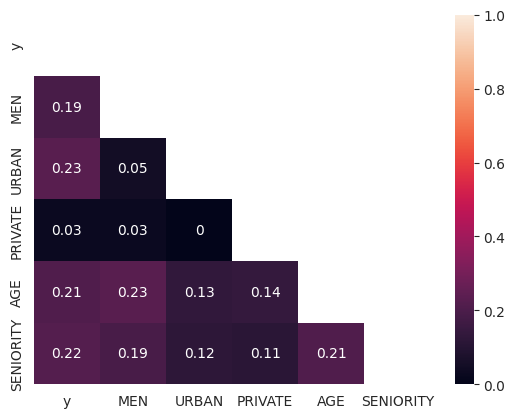

In [19]:
mask = np.zeros_like(cramer_df, dtype=bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
  ax = sns.heatmap(cramer_df, mask=mask, vmin=0., vmax=1, annot=True)
plt.show()

A interpretação da medida V de Cramer é semelhante à interpretação da correlação de Pearson, em que 0 indica ausência de depedência entre as variáveis e 1 representa completa dependendência ou associação entre as variáveis.

## Coeficiente de Phi

O coeficiente de Phi, introduzido por Karl Pearson wm 1912, é a medida de associação análoga ao coeficiente de Pearson para variáveis binárias.

O coeficiente de correlação de Pearson, quando aplica a dados dicotômicos, retorna o coeficiente de Phi.

$$
\begin{array}{|c|c|c|c|}
    \hline
    & y = 1 & y = 0 & \text{total} \\ \hline
    x = 1 & n_{11} & n_{10} & n_{1\bullet} \\ \hline
    x = 0 & n_{01} & n_{00} & n_{0\bullet} \\ \hline
    \text{total} & n_{\bullet1} & n_{\bullet0} & n \\ \hline
\end{array}
$$

Considere a tabela acima onde $n_{11}, n_{01}, n_{10}, n_{11}$ representam a contagem de observações para as variáveis dicotômicas $x$ e $y$.

O coeficiente de Phi, pode ser calculado do seguinte modo:

> $${\displaystyle \phi ={\frac {nn_{11}-n_{1\bullet }n_{\bullet 1}}{\sqrt {n_{1\bullet }n_{\bullet 1}(n-n_{1\bullet })(n-n_{\bullet 1})}}}}$$

Quando aplicado o coeficiente de Pearson, em dados binários, é retornado o coeficiente de Phi.

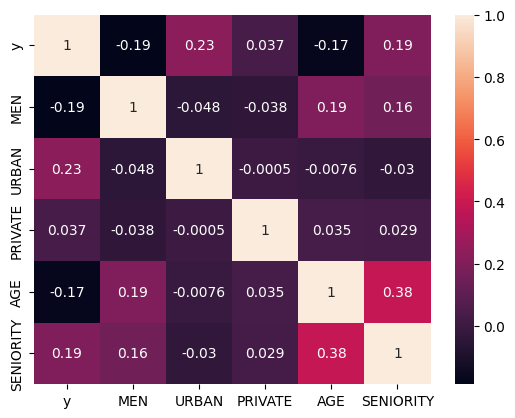

In [20]:
sns.heatmap(df.corr(), annot=True);

Verificamos que a maior correlação ocorre entre as variáveis AGE e SENIORITY, o que faz sentido uma vez que quanto mais velho um motorista, mais tempo como condutor ele pode ter. Em relação à variável resposta, as correlações estão distribuidas entre as variáveis MEN, URBAN, AGE e SENIORITY. Além disso, ser homem está positivamente correlacionado com a idade do motorista e a senioridade. Vale ressaltar que nenhuma dessas correlações se aproxima de 1, ou seja, não temos correlações fortes.

## Desdobramentos por variável

Aqui, iremos realizar um levantamento das estatísticas descritivas dos dados dentro de diferentes segmentações. Nosso objetivos é análisar como essas estatísticas se comportam em cada caso.

### Dentro da variável MEN

#### Selecionando apenas as entradas em que MEN=1

In [21]:
df_homens = df.query('MEN==1').copy()
df_homens.drop(columns=['MEN'], inplace=True)
df_homens.describe()

,y,URBAN,PRIVATE,AGE,SENIORITY
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,0.288257,0.335844,0.988360,48.480315,11.361520
std,0.453029,0.472365,0.107277,13.462748,6.668322
min,0.000000,0.000000,0.000000,20.000000,2.000000
25%,0.000000,0.000000,1.000000,38.000000,6.000000
50%,0.000000,0.000000,1.000000,47.000000,11.000000
75%,1.000000,1.000000,1.000000,58.000000,16.000000
max,1.000000,1.000000,1.000000,92.000000,38.000000


A partir das estatísticas descritivas, podemos notar que há uma redução na proporção de compras do seguro completo ($28.8257\%$ dos casos). A idade dos motoristas é cerca de dois anos maior do que no caso do conjunto de dados completo.

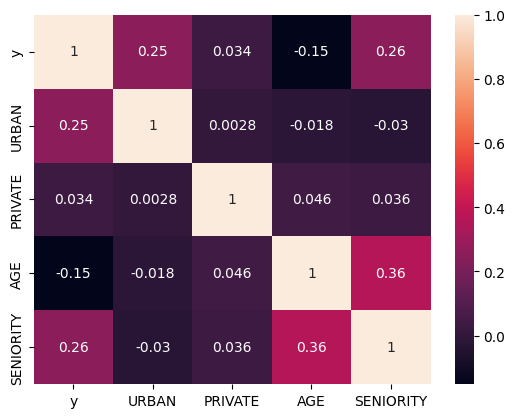

In [22]:
sns.heatmap(df_homens.corr(), annot=True);

Podemos notar que as variáveis URBAN e SENIORITY são as que se destacam em correlação com a variável resposta.

#### Selecionando apenas as entradas em que MEN=0

In [23]:
df_mulheres = df.query('MEN==0').copy()
df_mulheres.drop(columns=['MEN'], inplace=True)
df_mulheres.describe()

,y,URBAN,PRIVATE,AGE,SENIORITY
count,965.000000,965.000000,965.000000,965.000000,965.000000
mean,0.493264,0.388601,0.996891,42.587565,8.995855
std,0.500214,0.487685,0.055699,11.146230,5.837174
min,0.000000,0.000000,0.000000,20.000000,2.000000
25%,0.000000,0.000000,1.000000,34.000000,4.000000
50%,0.000000,0.000000,1.000000,42.000000,8.000000
75%,1.000000,1.000000,1.000000,49.000000,13.000000
max,1.000000,1.000000,1.000000,82.000000,30.000000


Dentro da parcela de entradas de clientes que são mulheres, notamos um salto na média de compra do seguro completo ($49.3264\%$). Também há uma redução na média da idade e tempo de habilitação dos motoristos.

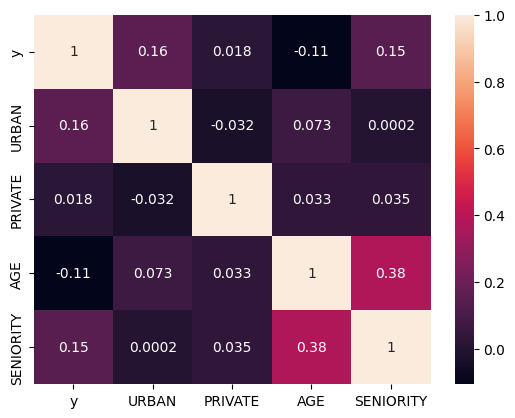

In [24]:
sns.heatmap(df_mulheres.corr(), annot=True);

Mais uma vez, as variáveis URBAN e SENIORITY são as que estão mais correlacionadas com a variável resposta.

### Dentro da variável URBAN

#### Selecionando as entradas em que URBAN=1

In [25]:
df_urbano = df.query('URBAN==1').copy()
df_urbano.drop(columns=['URBAN'], inplace=True)
df_urbano.describe()

,y,MEN,PRIVATE,AGE,SENIORITY
count,1356.000000,1356.000000,1356.000000,1356.000000,1356.000000
mean,0.487463,0.723451,0.990413,46.880531,10.505162
std,0.500027,0.447456,0.097479,12.915297,6.350463
min,0.000000,0.000000,0.000000,20.000000,2.000000
25%,0.000000,0.000000,1.000000,37.000000,5.000000
50%,0.000000,1.000000,1.000000,46.000000,9.000000
75%,1.000000,1.000000,1.000000,56.000000,15.000000
max,1.000000,1.000000,1.000000,92.000000,32.000000


Aqui também na um salto na proporção de compras do seguro completo.

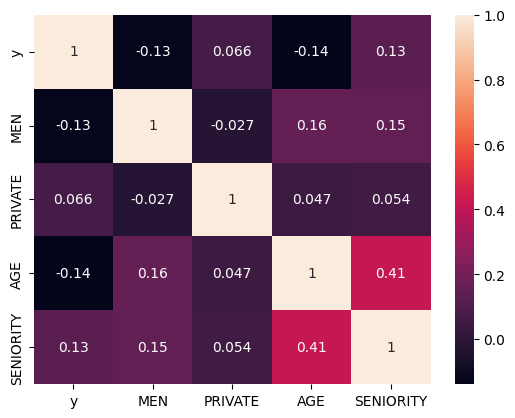

In [26]:
sns.heatmap(df_urbano.corr(), annot=True);

Podemos notar que há uma redução nas correlações das outras variáveis quando fixamos URBAN=1.

#### Selecionando as entradas em que URBAN=0

In [27]:
df_n_urbano = df.query('URBAN==0').copy()
df_n_urbano.drop(columns=['URBAN'], inplace=True)
df_n_urbano.describe()

,y,MEN,PRIVATE,AGE,SENIORITY
count,2530.000000,2530.000000,2530.000000,2530.000000,2530.000000
mean,0.259684,0.766798,0.990514,47.090119,10.918182
std,0.438548,0.422953,0.096953,13.311540,6.653369
min,0.000000,0.000000,0.000000,20.000000,2.000000
25%,0.000000,1.000000,1.000000,37.000000,5.000000
50%,0.000000,1.000000,1.000000,46.000000,10.000000
75%,1.000000,1.000000,1.000000,56.000000,15.000000
max,1.000000,1.000000,1.000000,90.000000,38.000000


Nesse caso, há uma redução na proporção de compras do seguro.

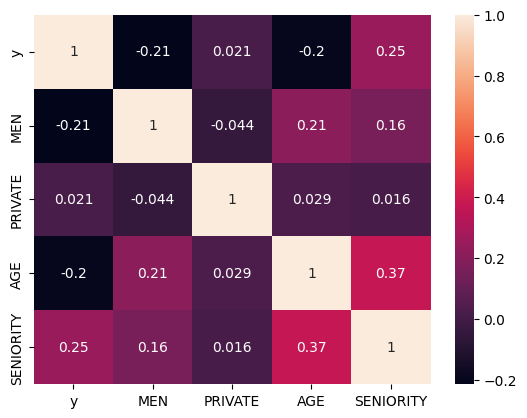

In [28]:
sns.heatmap(df_n_urbano.corr(), annot=True);

As principais correlações continuam sendo MEN, AGE e SENIORITY.

### Dentro da variável PRIVATE

#### Selecionando as entradas em que PRIVATE=1

In [29]:
df_privado = df.query('PRIVATE==1').copy()
df_privado.drop(columns=['PRIVATE'], inplace=True)
df_privado.describe()

,y,MEN,URBAN,AGE,SENIORITY
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000
mean,0.340868,0.750065,0.348922,47.062614,10.792673
std,0.474063,0.433031,0.476691,13.148895,6.544755
min,0.000000,0.000000,0.000000,20.000000,2.000000
25%,0.000000,1.000000,0.000000,37.000000,5.000000
50%,0.000000,1.000000,0.000000,46.000000,10.000000
75%,1.000000,1.000000,1.000000,56.000000,15.000000
max,1.000000,1.000000,1.000000,92.000000,38.000000


Dada a baixa proporção de entradas em que a variável PRIVATE é igual a 0, notamos que as diferenças nas estatísticas não são tão importantes.

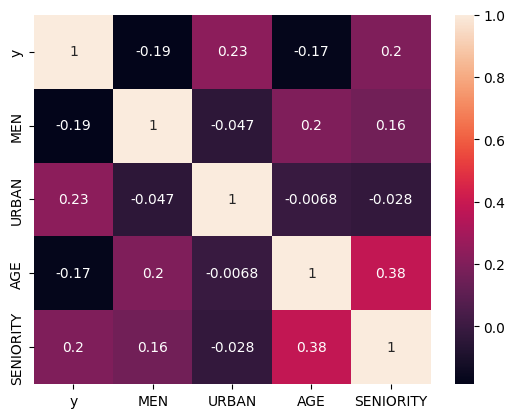

In [30]:
sns.heatmap(df_privado.corr(), annot=True);

O mesmo ocorre com relação às correlações.

#### Selecionando as entradas em que PRIVATE=0

In [31]:
df_n_privado = df.query('PRIVATE==0').copy()
df_n_privado.drop(columns=['PRIVATE'], inplace=True)
df_n_privado.describe()

,y,MEN,URBAN,AGE,SENIORITY
count,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.162162,0.918919,0.351351,42.270270,8.837838
std,0.373684,0.276725,0.483978,14.958551,7.037651
min,0.000000,0.000000,0.000000,20.000000,2.000000
25%,0.000000,1.000000,0.000000,31.000000,3.000000
50%,0.000000,1.000000,0.000000,38.000000,7.000000
75%,0.000000,1.000000,1.000000,54.000000,13.000000
max,1.000000,1.000000,1.000000,74.000000,26.000000


Dentro dos veículos em que PRIVATE=0, há um redução importante na proporção de entradas em que houve compra do seguro completo.

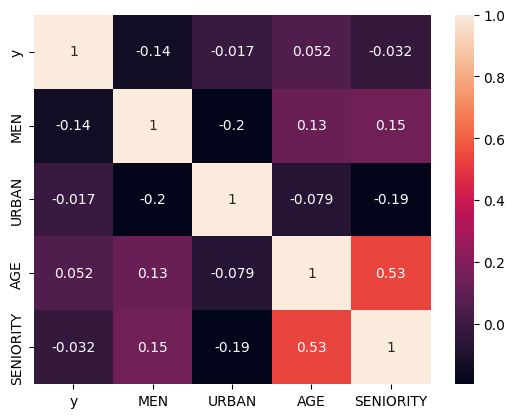

In [32]:
sns.heatmap(df_n_privado.corr(), annot=True);

Nesse caso, a variável MEN é a que se destacou em termos de correlação com a variável resposta.

### Considerando MEN=0 e URBAN=1
Selecionamos essa combinação pois essas variáveis foram as que apontaram os maiores aumentos na proporção de sucessos na variável resposta.

In [33]:
df_mulher_urbano = df.query('MEN==0 and URBAN==1').copy()
df_mulher_urbano.drop(columns=['MEN', 'URBAN'], inplace=True)
df_mulher_urbano.describe()

,y,PRIVATE,AGE,SENIORITY
count,375.00000,375.000000,375.000000,375.000000
mean,0.59200,0.994667,43.608000,8.997333
std,0.49212,0.072932,11.877424,6.010018
min,0.00000,0.000000,21.000000,2.000000
25%,0.00000,1.000000,35.000000,4.000000
50%,1.00000,1.000000,42.000000,7.000000
75%,1.00000,1.000000,52.000000,13.000000
max,1.00000,1.000000,82.000000,29.000000


Observamos que quase $60\%$ das entradas se converteram em compras de seguro completo.

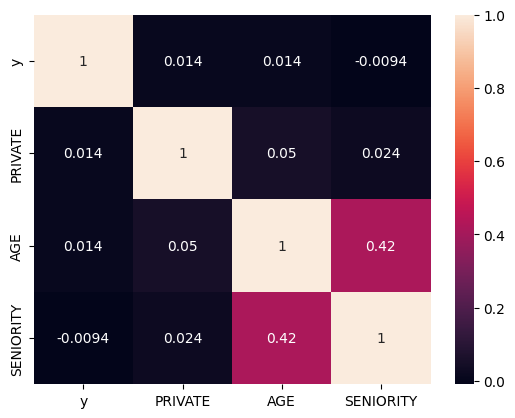

In [34]:
sns.heatmap(df_mulher_urbano.corr(), annot=True);

Há também uma importante redução correlação da variável resposta com as restantes.

## Avaliando separabilidade das classes pelos preditores contínuos

Uma das maneiras de se identificar quais variáveis são mais importantes em um problema de classificação binária é visualizar a separabilidade das classes, por variável.

A ideia é que quanto maior a separabilidade dos níveis da variável que se deseja prever, mais importante a variável é para o cenário da classificação.

Visualmente, essa separabilidade é diagnostica pelo grau de sobreposição da densidade da variável, separado pelos níveis da variável alvo.
Quanto menor a sobreposição entre as curvas de densidade, maior a importância da variável.

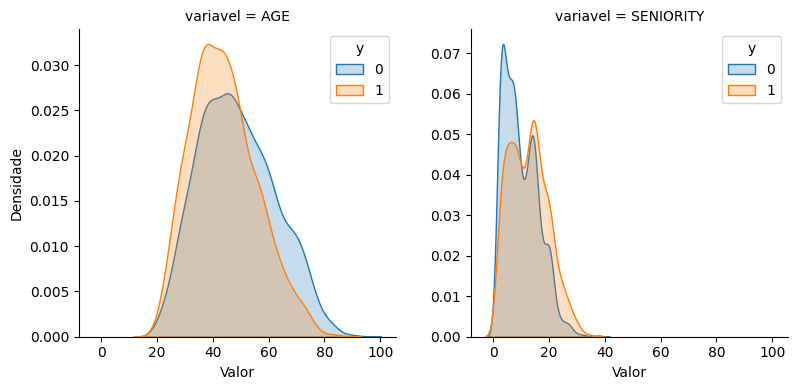

In [35]:
# Converte o df para o formato longo
df_melt = df.melt(id_vars=['y'], value_vars=['AGE', 'SENIORITY'])
df_melt.rename(columns={"variable":"variavel"}, inplace=True)

# Plota os graficos de densidade em um grid
g = sns.FacetGrid(df_melt, col='variavel', hue='y', col_wrap=3, sharey=False, height=4)

g.map(sns.kdeplot, 'value', fill=True, common_norm=False)

# Adiciona legenda em cada plot
for ax in g.axes.flat:
    ax.legend(loc='upper right', title='y')

# Ajusta labels
g.set_xlabels("Valor")
g.set_ylabels("Densidade")
plt.show()

Os gráficos acima nos mostram que as variáveis contínuas, `age` e `seniority` não possuem uma boa separabilidade entre as classes da variável `y`.

Isso, entretanto, não é um indicativo de que não sejam significativas, apenas que elas por si só, não são capazes de identificar o padrão de separação.

Privavelmente precisaremos de modelos que envolvam algum tipo de regressão nas variáveis.

## Outras considerações

### Transformações de variáveis e preprocessamento
* As variáveis y, MEN, URBAN e PRIVATE são categóricas e binárias, portanto não precisamos realizar nenhuma transformação nelas.
* Já as variáveis AGE e SENIORITY são numéricas e positivas. Como ainda não fizemos um levantamento dos modelos a serem utilizados (e as premissas de cada modelo), preferimos não realizar transformações do tipo escalonamento nessas variáveis.

### Seleção de variáveis
Devido ao baixo número de variáveis explicativas, podemos seguir com a modelagem do problema sem realizar uma pré-seleção das variáveis. Entretanto, dada a baixa variabilidade da variável PRIVATE, é possível que em momentos futuros nós deixemos de utilizá-la em nossos modelos.

# Análise de agrupamentos

Realizamos a análise de agrupamentos a fim de dividir os perfis dos clientes. Testamos os métodos KMeans, SpectralClustering e DBScan de modo a avaliar os seus diferentes resultados.

In [36]:
X = df.drop(columns='y').copy() # faz uma cópia do conjunto de dados removendo a variável resposta

## Utilizando KMeans

K-Means é um algoritmo de agrupamento que particiona os dados em KK clusters, onde cada dado pertence ao cluster com o centroide mais próximo. O objetivo é minimizar a soma das distâncias quadráticas entre os pontos de dados e os centroides do cluster ao qual pertencem.

Começamos utilizando o método do cotovelo para definir o número de agrupamentos.

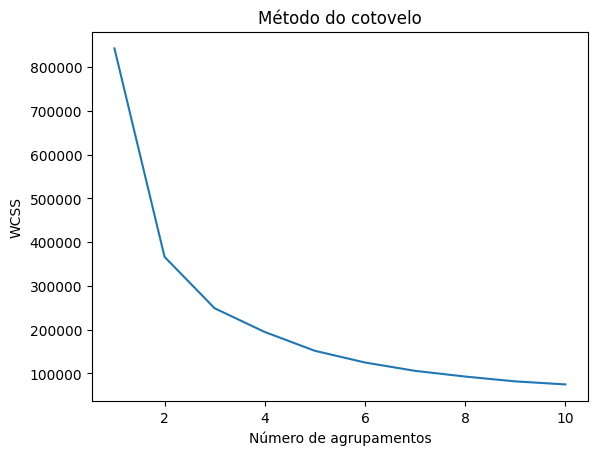

In [37]:
# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Método do cotovelo')
plt.xlabel('Número de agrupamentos')
plt.ylabel('WCSS')
plt.show()

Tomamos k = 4 agrupamentos, tendo em vista que a partir desse número a redução na soma dos quadrados dentro dos agrupamentos parece ter uma redução menos impactante.

In [38]:
df['group'] = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(X).labels_

In [39]:
df.groupby('group').describe()

y                                                  MEN            \
        count      mean       std  min  25%  50%  75%  max   count      mean   
group                                                                          
0       853.0  0.205158  0.404054  0.0  0.0  0.0  0.0  1.0   853.0  0.710434   
1      1383.0  0.392625  0.488511  0.0  0.0  0.0  1.0  1.0  1383.0  0.669559   
2       913.0  0.481928  0.499947  0.0  0.0  0.0  1.0  1.0   913.0  0.799562   
3       737.0  0.217096  0.412549  0.0  0.0  0.0  0.0  1.0   737.0  0.894166   

                                           URBAN                           \
            std  min  25%  50%  75%  max   count      mean       std  min   
group                                                                       
0      0.453827  0.0  0.0  1.0  1.0  1.0   853.0  0.366940  0.482253  0.0   
1      0.470542  0.0  0.0  1.0  1.0  1.0  1383.0  0.348518  0.476673  0.0   
2      0.400548  0.0  1.0  1.0  1.0  1.0   913.0  0.342826  0.474914  0.0   
3      0.307835  0.0  1.0  1.0  1.0  1.0   737.0  0.336499  0.472833  0.0   

                          PRIVATE                                          \
       25%  50%  75%  max   count      mean       std  min  25%  50%  75%   
group                                                                       
0      0.0  0.0  1.0  1.0   853.0  0.996483  0.059235  0.0  1.0  1.0  1.0   
1      0.0  0.0  1.0  1.0  1383.0  0.984816  0.122330  0.0  1.0  1.0  1.0   
2      0.0  0.0  1.0  1.0   913.0  0.993428  0.080844  0.0  1.0  1.0  1.0   
3      0.0  0.0  1.0  1.0   737.0  0.990502  0.097059  0.0  1.0  1.0  1.0   

               AGE                                                     \
       max   count       mean       std   min   25%   50%   75%   max   
group                                                                   
0      1.0   853.0  51.052755  5.174040  43.0  47.0  51.0  55.0  63.0   
1      1.0  1383.0  33.636298  5.144374  20.0  30.0  34.0  38.0  42.0   
2      1.0   913.0  47.261774  5.316562  37.0  43.0  47.0  51.0  59.0   
3      1.0   737.0  67.151967  6.241623  58.0  62.0  66.0  71.0  92.0   

      SENIORITY                                                     
          count       mean       std   min   25%   50%   75%   max  
group                                                               
0         853.0   6.307151  3.004208   2.0   4.0   6.0   8.0  14.0  
1        1383.0   7.070860  4.009130   2.0   4.0   6.0  10.0  17.0  
2         913.0  17.467689  3.982596  10.0  14.0  17.0  20.0  32.0  
3         737.0  14.601085  6.865628   2.0   9.0  15.0  19.0  38.0

In [40]:
df.groupby('group').mean().var()

y              0.018401
MEN            0.009973
URBAN          0.000172
PRIVATE        0.000025
AGE          190.121887
SENIORITY     30.578829
dtype: float64

Podemos notar que esse método produziu grupos de tamanhos relativamente semelhantes. A principal diferença entre os grupos se deu nas variáveis AGE e SENIORITY.

É importante notar que o método KMeans assume a esfericidade dos dados, o que nem sempre é verdade (a página https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html oferece alguns exemplos de como os agrupamentos podem ser prejudicados).

## Utilizando DBScan

DBSCAN é um algoritmo de clustering baseado na densidade que agrupa pontos de dados que estão próximos uns dos outros (dentro de uma distância $\epsilon$) e marca pontos em áreas de baixa densidade como ruído (classificados como o agrupamento -1). Nesse caso experimentamos utilizar uma métrica diferente da distância euclidiana, tendo em vista que a distância de Jaccard se comporta de maneira diferente para o caso em que temos variáveis categóricas. Também experimentamos com o valor de $\epsilon$, de modo a encontramos um número de conjuntos interessante para nossa análise.

In [41]:
df['group'] = DBSCAN(eps=0.18, min_samples=5, metric='jaccard').fit(X).labels_

In [42]:
df.groupby('group').describe()

y                                                  MEN            \
        count      mean       std  min  25%  50%  75%  max   count mean  std   
group                                                                          
-1        3.0  0.333333  0.577350  0.0  0.0  0.0  0.5  1.0     3.0  0.0  0.0   
 0      970.0  0.451546  0.497903  0.0  0.0  0.0  1.0  1.0   970.0  1.0  0.0   
 1     1917.0  0.208138  0.406082  0.0  0.0  0.0  0.0  1.0  1917.0  1.0  0.0   
 2       23.0  0.173913  0.387553  0.0  0.0  0.0  0.0  1.0    23.0  1.0  0.0   
 3      589.0  0.431239  0.495670  0.0  0.0  0.0  1.0  1.0   589.0  0.0  0.0   
 4      373.0  0.592493  0.492031  0.0  0.0  1.0  1.0  1.0   373.0  0.0  0.0   
 5       11.0  0.090909  0.301511  0.0  0.0  0.0  0.0  1.0    11.0  1.0  0.0   

                                 URBAN                                         \
       min  25%  50%  75%  max   count      mean      std  min  25%  50%  75%   
group                                                                           
-1     0.0  0.0  0.0  0.0  0.0     3.0  0.666667  0.57735  0.0  0.5  1.0  1.0   
 0     1.0  1.0  1.0  1.0  1.0   970.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
 1     1.0  1.0  1.0  1.0  1.0  1917.0  0.000000  0.00000  0.0  0.0  0.0  0.0   
 2     1.0  1.0  1.0  1.0  1.0    23.0  0.000000  0.00000  0.0  0.0  0.0  0.0   
 3     0.0  0.0  0.0  0.0  0.0   589.0  0.000000  0.00000  0.0  0.0  0.0  0.0   
 4     0.0  0.0  0.0  0.0  0.0   373.0  1.000000  0.00000  1.0  1.0  1.0  1.0   
 5     1.0  1.0  1.0  1.0  1.0    11.0  1.000000  0.00000  1.0  1.0  1.0  1.0   

           PRIVATE                                        AGE             \
       max   count mean  std  min  25%  50%  75%  max   count       mean   
group                                                                      
-1     1.0     3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     3.0  36.000000   
 0     1.0   970.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   970.0  48.205155   
 1     0.0  1917.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1917.0  48.719875   
 2     0.0    23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    23.0  43.391304   
 3     0.0   589.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   589.0  41.947368   
 4     1.0   373.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   373.0  43.651475   
 5     1.0    11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    11.0  41.636364   

                                               SENIORITY                       \
             std   min   25%   50%   75%   max     count       mean       std   
group                                                                           
-1      1.000000  35.0  35.5  36.0  36.5  37.0       3.0   5.333333  2.886751   
 0     13.036433  20.0  38.0  47.0  58.0  92.0     970.0  11.127835  6.382877   
 1     13.618738  20.0  38.0  47.0  58.0  90.0    1917.0  11.519040  6.791349   
 2     15.584780  21.0  30.5  39.0  56.0  73.0      23.0  10.173913  7.854658   
 3     10.621933  20.0  34.0  42.0  49.0  77.0     589.0   9.006791  5.727362   
 4     11.894325  21.0  35.0  42.0  52.0  82.0     373.0   9.008043  6.024363   
 5     15.995454  20.0  30.0  38.0  49.5  74.0      11.0   7.000000  5.422177   

                                   
       min  25%   50%   75%   max  
group                              
-1     2.0  4.5   7.0   7.0   7.0  
 0     2.0  6.0  11.0  16.0  32.0  
 1     2.0  6.0  11.0  16.0  38.0  
 2     2.0  3.0   9.0  15.0  26.0  
 3     2.0  4.0   8.0  13.0  30.0  
 4     2.0  4.0   7.0  13.0  29.0  
 5     2.0  3.0   4.0   9.5  17.0

Podemos notar que aqui também há uma tendência de se manter um grande número de observações em um único grupo, mas que não é tão homogêneo como no caso anterior. Nesse método, os agrupamentos formados possuem somente mulheres ou somente homens, que dirigem somente em ambientes urbanos ou rurais e que possuem somente carros próprios ou não.

### Interpretação dos Grupos DBScan

- Grupo -1: Grupo formado por 3 mulheres em que 1 delas acionou o seguro. 2 delas dirigem em ambiente urbano. Nenhum dos carros são privados. Elas possuem 35, 36 e 37 anos. E elas possuem uma média de 5 anos de carteira.

- Grupo 0: Grupo de 970 homens em que 45% acionou o seguro. Todos os carros são urbanos e privados. A idade média é de 48 anos e a senioridade média é de 11 anos.

- Grupo 1: Grupo de 1917 homens em que 20% acionou o seguro. Todos os carros trafegam em ambiente rural e são privados. A idade média dos motoristas é de 48 anos e a senioridade de 11 anos.

- Grupo 2: Grupo de 23 homens em que 17% acionou o seguro. Todos trafegam em ambiente rural. Todos os carros não são privados. A idade média é de 43 anos e a senioridade de 10 anos.

- Grupo 3: Grupo de 589 mulheres  em que 43% acionou o seguro. Todos os carros trafegam em ambiente rural. Todos os carros são privados. A idade média é de 41 anos e a senioridade média é de 9 anos.

- Grupo 4: Grupo de 373 mulheres em que cerca de 60% acionou o seguro. Todos os carros trafegam em ambiente urbano. Todos os carros são privados. A idade média é de 43 anos e a senioridade média é de 9 anos.

- Grupo 5: Grupo formado por 11 homens, em que 1 apenas acionou o seguro. Todos os carros são urbanos e não são privados. A idade média é de 41 anos e a senioridade de 7 anos.

In [43]:
df.groupby('group').mean().var()

y             0.031700
MEN           0.285714
URBAN         0.253968
PRIVATE       0.285714
AGE          18.570938
SENIORITY     4.948632
dtype: float64

In [44]:
# remove a coluna do agrupamento antes de prosseguirmos com a análise
df.drop(columns='group', inplace=True)

# Continuação da análise e modelagem





Nesta seção buscaremos lidar com os problemas levantados de desbalanceamento de classes para a variável sexo e buscaremos construir os primeiros modelos para o nosso problema de classificação.

## Desbalanço das classes

Como de costume em problemas de machine learning, faremos a divisão dos dados em treino e teste. Porém, antes temos de nos atentar ao desbalanço das classes.

### Proporção das *features* binárias

In [45]:
def get_proportions(column):
  """Calcula a proporção de valores dentro de uma coluna"""
  return column.value_counts(normalize=True)

proportions_df = df[['y', 'MEN','URBAN', 'PRIVATE']].apply(get_proportions)

In [46]:
proportions_df

,y,MEN,URBAN,PRIVATE
0,0.660834,0.248327,0.651055,0.009521
1,0.339166,0.751673,0.348945,0.990479


Na tabela acima vemos que estamos lidando com um problema de classes desbalanceadas. Nesse caso, ao definirmos nossa métrica de avaliação, não faz sentido pensarmos em **acurácia** dado que, um modelo que classificasse clientes, ao acaso, estaria correto 66% das vezes.

## Divisão de treino e teste

Antes de pensarmos em modelar nosso problema, realizaremos a divisão dos dados em treino e teste. É importante que busquemos manter a mesma proporção da *feature* resposta nos dados de treino e teste. Para isso realizaremos um `train_test_split` estratificado.

In [47]:
#Amostragem estratificada
X, y = df.iloc[:, 1:], df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y, test_size=0.2) #estratificando na variavel y

### Métricas de Avaliação

Antes de modelarmos nosso problema, precisamos definir as métricas que usaremos para avaliar nosso modelo.

Dada a natureza desbalanceada de nossos dados, não usaremos a acurácia como métrica de avaliação. Optaremos pela **AUC (Area Under the Curve)** que corresponde a área sob a curva ROC.

Além disso, dado o contexto do problema, imaginamos que é favorável que o número de **Falsos Negativos (FN) seja menor que o de Falsos Positivos (FP)**, dado que nos parece mais importante identificar corretamente os indivíduos mais propensos a acionarem o seguro, do que não realizar predições erradas.

Desse modo, o **recall (sensibilidade)** é uma métrica mais importante para nós também do que a **precision (precisão)**. Essas últimas duas serão avaliadas através de uma **matrix de confusão**.

### Pré-processamento

Nos modelos lineares, como a Regressão Logística, optaremos por aplicar a padronização dos dados.
Já nos modelos baseados em árvores, não realizaremos nenhuma escala nos dados.

# 3. Ajuste de modelos

## **1. Regressão Logística Clássica com função de ligação Logit**


Unindo o nossos dados de treino em um único DataFrame para atender ao formato da biblioteca stastmodel.



In [48]:
#dados de treino
df_train = X_train.copy(deep=True)
df_train['y'] = y_train.copy(deep=True)
#dados de teste
df_test = X_test.copy(deep=True)
df_test['y'] = y_test.copy(deep=True)

In [49]:
formula = "y ~ MEN + URBAN + AGE + SENIORITY"
lr_model = smf.glm(formula=formula, data=df_train, family=sm.families.Binomial())
result_lr = lr_model.fit()
print(result_lr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3108
Model:                            GLM   Df Residuals:                     3103
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1649.2
Date:                Tue, 25 Jun 2024   Deviance:                       3298.4
Time:                        20:50:29   Pearson chi2:                 3.08e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1972
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8901      0.170      5.244      0.0

O ajuste de uma modelo generalizado com função de ligação logit (Regressão Logística), nos retornou o seguinte modelo:

$$
\widehat{P(y=1)} = \dfrac{exp(-0.94MEN + 1.22URBAN + -0.06AGE + 0.13 SENIORITY)}{1 - exp(-0.94MEN + 1.22URBAN + -0.06AGE + 0.13 SENIORITY)}
$$

Este modelo apresentou um ajuste muito semelhante ao que encontramos no trabalho de *Bazán, J. L., Torres-Avilés, F., Suzuki, A. and Louzada, F. (2017)*.

As estimativas dos parâmetros da regressão nos indicam o seguinte:

* Conforme as variáveis `MEN` e `AGE` crescem, a chance de acionamento do seguro tende a diminuir.
* Já as variáveis, `URBAN` e `SENIORITY` são preditores que influenciam positivamente para o crescimento da chance de um cliente acionar o seguro.

### Interpretação dos Coeficientes da Regressão Logística

In [50]:
odds_ratio_men = np.exp(-0.94)
odds_ratio_urban = np.exp(1.22)
odds_ratio_age = np.exp(-0.06)
odds_ratio_seniority = np.exp(0.13)

lr_odds_ratio_df = pd.DataFrame(
    {
        "Razão de Chances":[odds_ratio_men, odds_ratio_age, odds_ratio_urban, odds_ratio_seniority]
    }
)

idxs = ["Homem", "Idade", "Urbano", "Senioridade"]

lr_odds_ratio_df.index = idxs

In [51]:
lr_odds_ratio_df

,Razão de Chances
Homem,0.390628
Idade,0.941765
Urbano,3.387188
Senioridade,1.138828


Podemos interpretar a razão de chances dos coeficientes do seguinte modo:

1. O cliente ser Homem diminui em 61% a chance de acionamento do seguro
2. Para cada ponto de Idade do cliente, a chance de acionamento do seguro cai em 6%
3. O veículo ser Urbano provoca um aumento em 238% da chance de acionamento do seguro.
4. A cada ponto adicional na senioridade dos cliente a chance de acionamento do seguro aumenta em 13,8%.

### Área sob a curva ROC para os dados de teste

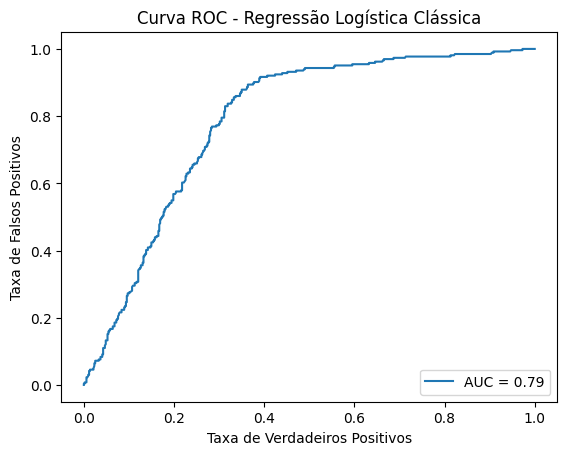

In [52]:
predicted_probs = result_lr.predict(df_test)
fpr, tpr, thresholds = roc_curve(df_test['y'], predicted_probs)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.title("Curva ROC - Regressão Logística Clássica")
plt.xlabel("Taxa de Verdadeiros Positivos")
plt.ylabel("Taxa de Falsos Positivos")
plt.show()

Utilizando um limiar de 29% para a classificação


A curva ROC nos indica que o modelo Logístico Clássico consegue distinguir bem, no geral, entre classes positivas (acionar o seguro) e negativas (não acionar).

Podemos visualizar onde se encontraria a região do limiar de 0.29 - que corresponde ao ponto de máximo da curva ROC. E que apresentaria o limiar com o melhor desempenho que balanceia a taxa de TP e FP.

**Matrix de Confusão**

As predições da biblioteca `statsmodels` não nos retornam as classes preditas mas sim, as probabilidades de pertencimento à classe positiva. Desse modo, para construirmos uma matrix de confusão precisamos definir um threshold para as probabilidades, para que tenhamos as labels das respectivas predições.

Nesse caso, selecionamos um **threshold de 50%**

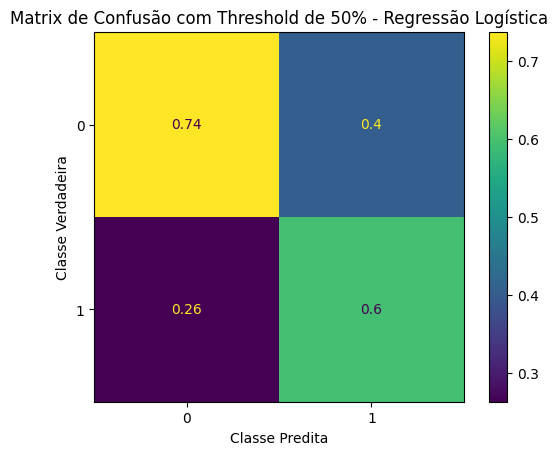

In [53]:
threshold = 0.5
predicted_classes = (predicted_probs > threshold).astype(int)

conf_matrix = confusion_matrix(df_test['y'], predicted_classes, normalize='pred')

display = ConfusionMatrixDisplay(conf_matrix)
display.plot()
plt.title("Matrix de Confusão com Threshold de 50% - Regressão Logística")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

In [54]:
# precision, recall and F1-score
lr_precision = precision_score(df_test['y'], predicted_classes)
lr_recall = recall_score(df_test['y'], predicted_classes)
lr_f1_score = f1_score(df_test['y'], predicted_classes)

print("Regressão Logística")
print("Precisão:", round(lr_precision,3))
print("Recall:", round(lr_recall,3))
print("F1_Score", round(lr_f1_score,3))

Regressão Logística
Precisão: 0.596
Recall: 0.402
F1_Score 0.48


Para o nosso objetivo, a regressão logística com um limiar de 50% não obteve resultados muito satisfatórios.

Temos uma precisão de 60% e um recall de 40%.

Mas, podemos usar como um modelo baseline para os próximos modelos.

## Atenção

Comparado ao paper, nos obtemos praticamente o mesmo modelo de regressão que é apresentado, porém, no paper eles obtem um sensibilidade (recall) de cerca de 88%, enquanto nós obtemos uma sensibilidade de apenas 40%.

Aqui usamos o `statsmodels` para ajustar o modelo que não nos retorna a predição das classes, mas sim a predição das probabilidades.

Mas, em geral bibliotecas de Machine Learning no Python, vão devolver as clases preditas, com base em um threshold de 50%.

O R, ao contrário, vai usar o ponto ótimo da curva ROC, para definir esse valor.

No trabalho de *Bazan, et al 2017* eles utilizam o ponto ótimo da curva ROC, para definição do threshold, o que nos devolve uma sensibilidade de 88%.

In [55]:
#sem dividir em conjunto de treino e teste, vamos ajustar os dados no modelo todo
formula = "y ~ MEN + URBAN + AGE + SENIORITY"
lr_model_all_data = smf.glm(formula=formula, data=df, family=sm.families.Binomial())
result_lr_all_data = lr_model_all_data.fit()
print(result_lr_all_data.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 3886
Model:                            GLM   Df Residuals:                     3881
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2061.2
Date:                Tue, 25 Jun 2024   Deviance:                       4122.3
Time:                        20:50:30   Pearson chi2:                 3.86e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1976
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7859      0.151      5.190      0.0

In [56]:
fitted_values_all_data = result_lr_all_data.predict(df)

def fitted_values_all_data_classes(fitted_values, threshold:float):
  fitted_classes = (fitted_values > threshold).astype(int)
  return fitted_classes

def sensibilidade(fitted_classes, y_true):
  TP = np.sum((fitted_classes == 1) & (y_true == 1))
  FN = np.sum((fitted_classes == 0) & (y_true == 1))

  sensibilidade = TP/(TP + FN)
  return sensibilidade

def especificidade(fitted_classes, y_true):
  TN = np.sum((fitted_classes == 0) & (y_true == 0))
  FP = np.sum((fitted_classes == 1) & (y_true == 0))

  especificidade = TN/(TN + FP)
  return especificidade

def precisao(fitted_classes, y_true):
  TP = np.sum((fitted_classes == 1) & (y_true == 1))
  FP = np.sum((fitted_classes == 1) & (y_true == 0))

  precisao = TP/(TP + FP)
  return precisao

fitted_classes_all_data = fitted_values_all_data_classes(fitted_values_all_data, 0.29)
sensibilidade = sensibilidade(fitted_classes_all_data, y_true=df['y'])
especificidade = especificidade(fitted_classes_all_data, y_true=df['y'])
precisao = precisao(fitted_classes_all_data, y_true=df['y'])
balanced_accuracy_lr = balanced_accuracy_score(df['y'], (fitted_values_all_data > 0.29).astype(int))

print("Sensibilidade", sensibilidade)
print("Especificidade", especificidade)
print("Precisão", precisao)
print("Acurácia Balanceada", balanced_accuracy_lr)


Sensibilidade 0.8763277693474962
Especificidade 0.6479750778816199
Precisão 0.5609519184069937
Acurácia Balanceada 0.7621514236145581


In [57]:
def get_classification_report(y_test, y_pred):
    '''Source: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format'''
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report.sort_values(by=['f1-score'], ascending=False)
    return df_classification_report

In [58]:
#Usando um limiar de 29% para a regressão logística
y_pred = (predicted_probs > 0.29).astype(int)

logistic_regression_report = get_classification_report(y_test, y_pred)
logistic_regression_report

,precision,recall,f1-score,support
0,0.910082,0.649805,0.758229,514.000000
weighted avg,0.791981,0.726221,0.733192,778.000000
accuracy,0.726221,0.726221,0.726221,0.726221
macro avg,0.736063,0.762403,0.721337,778.000000
1,0.562044,0.875000,0.684444,264.000000


Veja que com um threshold de 0.29, obtemos os mesmos resultados para a sensibilidade e a especificidade que foram obtidos em *Bazan et al, 2017*

Vale salientar também que a mudança do limiar(threshold) de 50% para 29% incrementou a sensibilidade em 40% enquanto que perdemos apenas 4% de precisão.

## **Regressão Logística Balanceada - Cost Sensitive Learning**

*Cost Sensitive Learning* refere-se a uma subárea do aprendizado de máquina que está interessada em problemas de classificação em que o custo de classificações erradas, não é o mesmo.

Classificações corretas possuem custo zero, porém classificações errôneas possuem um custo maior, na prática, difícil de estimar.

No nosso exemplo da seguradora, o custo de uma classificação errada incorre tanto em custos financeiros ao cliente, quanto à companhia.

Em problemas de desbalanceamento, a heurística mais utilizada para estimar os custos é o *Imbalanced Ratio (IR)*

$$
IR=\frac{|\mathcal{X}_1|}{|\mathcal{X}_0|}
$$

Onde $|\mathcal{X}_1|$ representa o subconjunto dos dados com a classe majoritária e $|\mathcal{X}_0|$ representa o subconjunto dos dados que pertencem à classe minoritária.

A seguir realizamos o balanceamento das classes, definido o parâmetro `class_weight = balanced` dentro do modelo de Regressão Logística.
Desse modo, os pesos para as classes são ajustados de acordo com o $IR$

Além disso, decidimos pelo mudança no peso associado as classes, ao invés do uso de técnicas de reamostragem, como *undersampling* ou *oversampling* devido ao fato do nosso conjunto de dados não possuim um desbalanço tão extremo, quanto o recomendado pela literatura para o uso de tais métodos.

In [59]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [60]:
lr_clf_pipe = Pipeline([('scaler', StandardScaler()), ('logistic', LogisticRegression(class_weight='balanced', random_state=42))])

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=123)

param_grid = {
    "logistic__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid_search = GridSearchCV(estimator=lr_clf_pipe,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

cv_f1 = grid_search.best_score_
test_f1 = grid_search.score(X_test, y_test)

print(f'Cross-Validation F1-Score: {cv_f1}\nTest F1-Score: {test_f1}')

Cross-Validation F1-Score: 0.6631708868597546
Test F1-Score: 0.6601307189542484


### Balanceamento de Classes - Mudança no limiar da Curva ROC

Uma característica que devemos nos atentar em problemas de classificação com dados desbalanceados é o fato dos valores para os limiares entre TP(Verdadeiros Positivos) e FP(Falsos Positivos) se modificarem, quando o balanceamento é realizado.

No gráfico abaixo, vemos a curva ROC para o modelo Logístico sem balanceamento (sem pesos) e outra para o modelo balanceado (com pesos).

Perceba que, no modelo desbalanceado, como visto no trabalho de *Bazan et al, 2017* o ponto máximo da curva ROC residia em 0.29. Já para os dados balanceados o limiar foi deslocado e reside em torno de 0.41

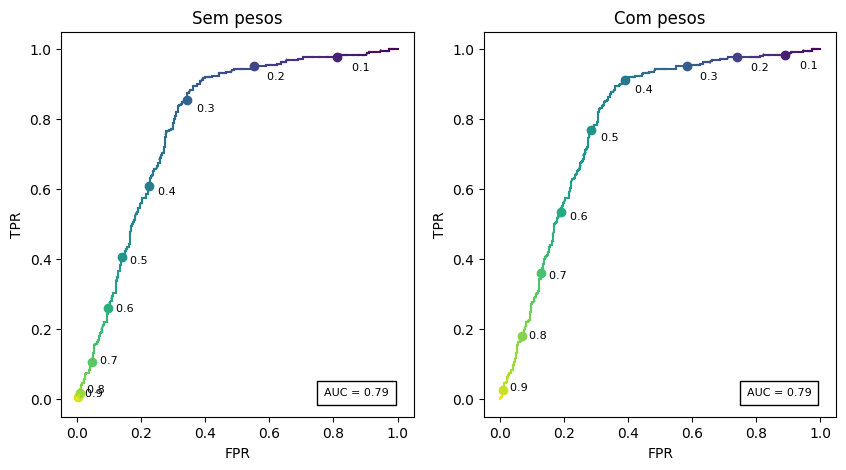

In [61]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))

#regressão logística sem os pesos nas classes
# without weights
model = LogisticRegression(random_state=2)
model.fit(X_train, y_train)
y_probs_raw = model.predict_proba(X_test)[:,1]
complete_plot_roc(y_test, y_probs_raw, ax[0])
ax[0].set_title("Sem pesos")

# com pesos
model = LogisticRegression(random_state=2, class_weight='balanced')
model.fit(X_train, y_train)
y_probs_weights = model.predict_proba(X_test)[:,1]
complete_plot_roc(y_test, y_probs_weights, ax[1])
ax[1].set_title("Com pesos")

plt.show()

Podemos definir o novo limiar de classificação a partir da análise da curva de Precision/Recall (Precisão/Sensibilidade).

O limiar ótimo corresponde ao ponto que maximiza a precisão e a especificidade do modelo.

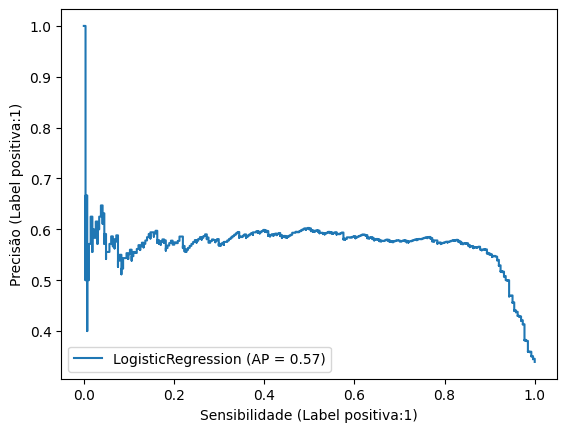

In [62]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_recall_curve

PrecisionRecallDisplay.from_estimator(
    model, X_test, y_test
)
plt.ylabel("Precisão (Label positiva:1)")
plt.xlabel("Sensibilidade (Label positiva:1)")
plt.show()

In [63]:
def argmax_precision_recall(y_test, y_pred):

  """Calcula o ponto máximo da curva de precision/recall"""

  precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
  fscore = (2 * precision * recall) / (precision + recall)

  ix = np.argmax(fscore)
  best_threshold = thresholds[ix]

  return best_threshold, fscore[ix]

In [64]:
best_threshold, fscore = argmax_precision_recall(y_test, y_probs_weights)
print(f"Limiar Argmax: {best_threshold}, F-Score: {fscore}")

Limiar Argmax: 0.4187133516635651, F-Score: 0.6890510948905109


Concluímos que para o modelo com classes balanceadas o Limiar de classificação que maximiza a curva de Precisão/Sensibilidade é, aproximadamente, 0.42.

In [65]:
y_pred = (grid_search.predict_proba(X_test)[:,1] > 0.42).astype(int)
balanced_accuracy_blr = balanced_accuracy_score(y_test, y_pred)

print("Acurácia Balanceada - Regressão Logística Balanceada", balanced_accuracy_blr)

# #Classification Report
balanced_logistic_regression_report = get_classification_report(y_test, y_pred)
balanced_logistic_regression_report

Acurácia Balanceada - Regressão Logística Balanceada 0.7660874307275085


,precision,recall,f1-score,support
0,0.919220,0.642023,0.756014,514.000000
weighted avg,0.797617,0.726221,0.732982,778.000000
accuracy,0.726221,0.726221,0.726221,0.726221
macro avg,0.740040,0.766087,0.722077,778.000000
1,0.560859,0.890152,0.688141,264.000000


In [66]:
print("Acurácia Balanceada - Regressão Logística", round(balanced_accuracy_lr,2))
print("Acurácia Balanceada - Regressão Logística Balanceada", round(balanced_accuracy_blr,2))
print()

comparison_report = pd.concat([logistic_regression_report, balanced_logistic_regression_report], axis=1, keys=['Regressão Logística', 'Regressão Logística Balanceada'])
comparison_report

Acurácia Balanceada - Regressão Logística 0.76
Acurácia Balanceada - Regressão Logística Balanceada 0.77



Regressão Logística                                  \
                       precision    recall  f1-score     support   
0                       0.910082  0.649805  0.758229  514.000000   
weighted avg            0.791981  0.726221  0.733192  778.000000   
accuracy                0.726221  0.726221  0.726221    0.726221   
macro avg               0.736063  0.762403  0.721337  778.000000   
1                       0.562044  0.875000  0.684444  264.000000   

             Regressão Logística Balanceada                                  
                                  precision    recall  f1-score     support  
0                                  0.919220  0.642023  0.756014  514.000000  
weighted avg                       0.797617  0.726221  0.732982  778.000000  
accuracy                           0.726221  0.726221  0.726221    0.726221  
macro avg                          0.740040  0.766087  0.722077  778.000000  
1                                  0.560859  0.890152  0.688141  264.000000

O balanceamento das classes, modifica a superfície de decisão para o nosso modelo, aproximando-a mais da classe minoritária.

Entretanto, o balanceamento geralmente introduz um viés no nosso modelo, ajustando-a distribuição que não necessariamente seja fidedigna aos dados reais.

Concluímos que é muito difícil avaliar a qualidade entre os modelos balanceados ou não, uma vez que não possuímos mais dados de treinamento para avaliar o desempenho de ambos os modelos e as eventuais taxas de TP e FP.

Dado que o desbalanceamento dos nossos dados não é tão severo, em um contexto de produção, talvez o balanceamento não seja necessária e o balanceamento do modelo possa ser realizado apenas ajustando o limiar de classificação a partir da análise das curvas de Precisão/Especificidade (Precision/Recall)

### **!! Observação Importante - Modelo Logístico !!**

Em *J.L. BÁZAN ET AL.*, os resultados obtidos para o modelo de classificação com ligação Logit foram:



In [67]:
bazan_results_table = {
    "link": ["logit", "Power cauchit", "Reversal power cauchit"],
    "Rate of good classification" : [0.67, 0.71, 0.72],
    "Sensitivity":[0.17, 0.56, 0.67],
    "Specificity":[0.94, 0.80, 0.75],
    "Empirical AUC":[0.79, 0.79, 0.79],
    "Binormal AUC":[0.76, 0.78, 0.80]
}

bazan_results = pd.DataFrame(bazan_results_table)

In [68]:
bazan_results

,link,Rate of good classification,Sensitivity,Specificity,Empirical AUC,Binormal AUC
0,logit,0.67,0.17,0.94,0.79,0.76
1,Power cauchit,0.71,0.56,0.80,0.79,0.78
2,Reversal power cauchit,0.72,0.67,0.75,0.79,0.80


**Os valores de Sensitivity que foram obtidos por *J.L BÁZAN ET AL* para o modelo com ligação logito, não correspondem aos valores que nós obtemos**.



## **2. Random Forest**


O modelo Random Forest é uma técnica de *ensemble*.
Métodos *ensemble* correspondem a um grupo de algortimos dentro do aprendizado de máquina que buscam construir modelos a apartir da agregação de resultados de diferentes modelos preditores.

O modelo *Ramdom Forest* (Floresta Aleatória) é um *ensemble* de Árvores de decisão. Cada árvore de decisão é ajustada em uma amostra do conjunto de treino, neste nosso exemplo as amostras possuem o tamanho do conjunto de treino, selecionadas aleatoriamente.

Ao final, a predição é realizada a partir de uma votação entre todas as árvores onde a predição final é a classe com a maior votação entre todas as árvores.

No exemplo abaixo nós ajustamos 100 Arvores de decisão, com uma profundidade `max_depth=20`, ou seja, as árvores tem uma profundidade máxima de 20 nodes.

In [69]:
rf_clf = RandomForestClassifier(random_state=42, max_depth=20)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

#Avaliando o modelo
rf_precision = precision_score(y_true=y_test, y_pred=y_pred_rf)
rf_recall =  recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)

print("Random Forest")
print("Acurácia Balanceada", rf_balanced_accuracy)
print("Precisão:", rf_precision)
print("Sensibilidade:", rf_recall)
print("F1 Score", rf_f1)

Random Forest
Acurácia Balanceada 0.6457080532956019
Precisão: 0.5418326693227091
Sensibilidade: 0.5151515151515151
F1 Score 0.5281553398058252


In [70]:
def especificidade(y_pred, y_true):
  TN = np.sum((y_pred == 0) & (y_true == 0))
  FP = np.sum((y_pred == 1) & (y_true == 0))

  especificidade = TN/(TN + FP)
  return especificidade

### Curva Precisão/Sensibilidade - Random Forest

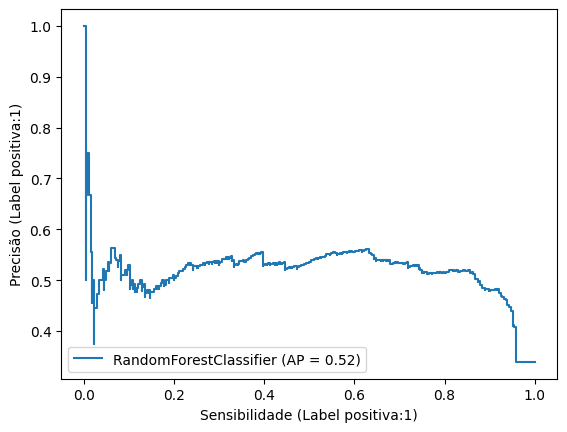

In [71]:
PrecisionRecallDisplay.from_estimator(
    rf_clf, X_test, y_test
)
plt.ylabel("Precisão (Label positiva:1)")
plt.xlabel("Sensibilidade (Label positiva:1)")
plt.show()

In [72]:
y_probs = rf_clf.predict_proba(X_test)[:,1]

In [73]:
best_threshold, fscore = argmax_precision_recall(y_test, y_probs)
print(f"Limiar Argmax: {best_threshold}, F-Score: {fscore}")

Limiar Argmax: 0.13938095238095238, F-Score: 0.6466380543633762


In [74]:
threshold = 0.14

y_probs = rf_clf.predict_proba(X_test)[:,1]
y_pred_rf = (y_probs >= threshold).astype('int')

# #Avaliando o modelo
rf_precision_best_thrd = precision_score(y_true=y_test, y_pred=y_pred_rf)
rf_recall_best_thrd =  recall_score(y_test, y_pred_rf)
rf_f1_best_thrd = f1_score(y_test, y_pred_rf)
rf_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_rf)

print("Random Forest - Limiar de 14%")
print("Acurácia Balanceada", rf_balanced_accuracy)
print("Precisão:", rf_precision_best_thrd)
print("Sensibilidade:", rf_recall_best_thrd)
print("Especificidade", especificidade(y_pred_rf, y_test))
print("F1 Score", rf_f1_best_thrd)

Random Forest - Limiar de 14%
Acurácia Balanceada 0.7228289706402546
Precisão: 0.5184331797235023
Sensibilidade: 0.8522727272727273
Especificidade 0.5933852140077821
F1 Score 0.6446991404011461


### Curva ROC para os dados de teste

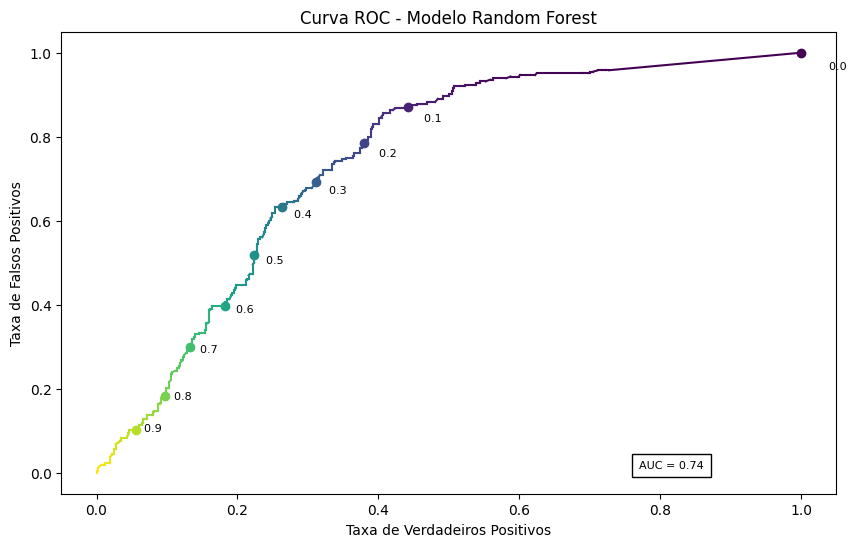

In [75]:
fig, ax = plt.subplots(figsize=(10,6))
complete_plot_roc(y_test, y_probs, ax)
plt.title("Curva ROC - Modelo Random Forest")
plt.xlabel("Taxa de Verdadeiros Positivos")
plt.ylabel("Taxa de Falsos Positivos")
plt.show()

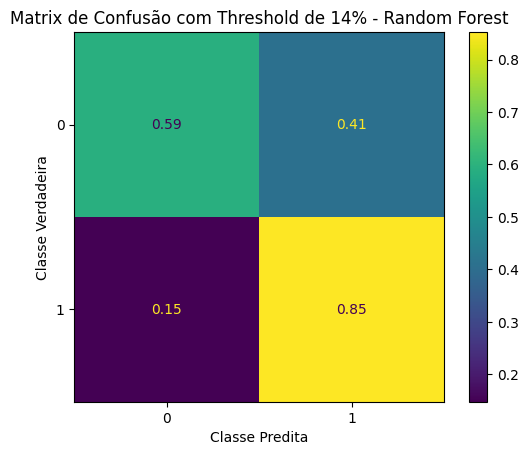

In [76]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_clf.classes_, normalize="true")
disp = ConfusionMatrixDisplay(cm, display_labels=rf_clf.classes_)
disp.plot()
plt.title("Matrix de Confusão com Threshold de 14% - Random Forest")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.show()

In [77]:
random_forest_report = get_classification_report(y_test, y_pred_rf)
random_forest_report

,precision,recall,f1-score,support
0,0.886628,0.593385,0.710956,514.000000
weighted avg,0.761688,0.681234,0.688473,778.000000
accuracy,0.681234,0.681234,0.681234,0.681234
macro avg,0.702531,0.722829,0.677827,778.000000
1,0.518433,0.852273,0.644699,264.000000



## **2.1 Random Forest Balanceada**



Dado que estamos em um cenário de classes desbalanceadas, podemos construir um modelo *ensemble* de árvores balanceadas, utilizando técnicas de reamostragem.

O modelo proposto por *Chao Chen, Andy Liaw, Leo Breiman, and others. Using random forest to learn imbalanced data. University of California, Berkeley, 2004.*, buscam melhorar a a acurácia e a precisão na classificação das classes minoritárias.

O modelo busca combinar as técnicas de *boostrap* e *ensemble* de modo a realizar uma subamostra da classe majoritária e construir cada árvore do *ensemble* em datasets cada vez mais balanceados.

Segundo os autores, o algortimo pode ser descrito da seguinte maneira:
> 1. Para cada iteração na floresta aleatória, extraia uma amostra bootstrap da classe minoritária. Extraia aleatoriamente o mesmo número de casos, com reposição, da classe majoritária.

> 2. Induza uma árvore de classificação a partir dos dados até o tamanho máximo, sem poda. A árvore é induzida com o algoritmo CART, com a seguinte modificação: Em cada nó, em vez de procurar através de todas as variáveis para a divisão ótima, procure apenas através de um conjunto de variáveis selecionadas aleatoriamente.

> 3. Repita os dois passos acima pelo número de vezes desejado. Agrupe as previsões do conjunto e faça a previsão final.

Usaremos a biblioteca **imbalanced-learn** do Python para a construção da árvore balanceada.

In [78]:
!pip install imbalanced-learn -q

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [81]:
brf_clf = BalancedRandomForestClassifier(
    sampling_strategy="all", replacement=True, max_depth=20, random_state=42,
    bootstrap=False)

brf_clf.fit(X_train, y_train)

BalancedRandomForestClassifier(bootstrap=False, max_depth=20, random_state=42,
                               replacement=True, sampling_strategy='all')

### Curva ROC - Random Forest Balanceada

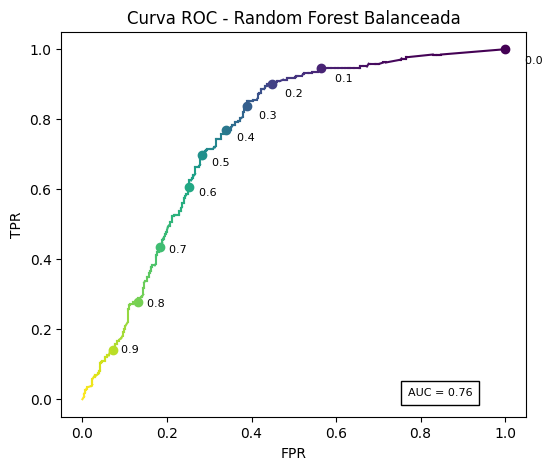

In [82]:
fig, ax = plt.subplots(ncols=1, figsize=(6,5))
y_probs = brf_clf.predict_proba(X_test)[:,1]
complete_plot_roc(y_test, y_probs, ax)
plt.title("Curva ROC - Random Forest Balanceada")
plt.show()

Novamente, percebemos que a curva ROC se modificou com os dados balanceados.
Vamos computar o ponto máximo da curva ROC para os dados balanceados e calcular as métricas de avaliação do modelo para os dados de teste.

In [83]:
best_threshold, fscore = argmax_precision_recall(y_test, y_probs)
print(f"Limiar Argmax: {best_threshold}, F-Score: {fscore}")

Limiar Argmax: 0.20199999999999999, F-Score: 0.6547455295735901


In [84]:
threshold = 0.20

predicted_proba = brf_clf.predict_proba(X_test)
predicted_best_thrd = (predicted_proba[:,1] >= threshold).astype('int')

#Avaliando o modelo
brf_precision_best_thrd = precision_score(y_true=y_test, y_pred=predicted_best_thrd)
brf_recall_best_thrd =  recall_score(y_test, predicted_best_thrd)
brf_f1_best_thrd = f1_score(y_test, predicted_best_thrd)
brf_specificity_best_thrd = especificidade(predicted_best_thrd, y_test)
brf_balanced_accuracy = balanced_accuracy_score(y_test, predicted_best_thrd)

print("Random Forest Balanceada - Limiar de 20%")
print("Acurácia Balanceada", brf_balanced_accuracy)
print("Precisão:", brf_precision_best_thrd)
print("Sensibilidade:", brf_recall_best_thrd)
print("Especificidade:", brf_specificity_best_thrd)
print("F1 Score", brf_f1_best_thrd)

Random Forest Balanceada - Limiar de 20%
Acurácia Balanceada 0.7289676924890933
Precisão: 0.5107296137339056
Sensibilidade: 0.9015151515151515
Especificidade: 0.556420233463035
F1 Score 0.6520547945205479


In [85]:
balanced_random_forest_report = get_classification_report(y_test, predicted_best_thrd)
balanced_random_forest_report

,precision,recall,f1-score,support
0,0.916667,0.556420,0.692494,514.000000
weighted avg,0.778919,0.673522,0.678772,778.000000
accuracy,0.673522,0.673522,0.673522,0.673522
macro avg,0.713698,0.728968,0.672274,778.000000
1,0.510730,0.901515,0.652055,264.000000


## 3. XGBoost Classifier

O XGBoost (eXtreme Gradient Boosting) é um algoritmo de aprendizado de máquina baseado em árvores de decisão que faz parte da família dos métodos de boosting. Ele foi projetado para ser eficiente, flexível e portátil, oferecendo alto desempenho tanto em termos de tempo de treinamento quanto de precisão preditiva. Boosting é uma técnica que combina vários modelos fracos para criar um modelo forte. No contexto do XGBoost, isso significa criar várias árvores de decisão sequencialmente, onde cada nova árvore tenta corrigir os erros cometidos pelas árvores anteriores.

O XGBoost utiliza o método de Gradient Boosting, que otimiza a função de perda através do gradiente descendente. Isso implica que, a cada nova árvore adicionada, o modelo busca minimizar os resíduos (erros) das previsões anteriores ajustando-se pelo gradiente da função de perda.

In [86]:
!pip install xgboost -q

In [87]:
from xgboost import XGBClassifier

In [88]:
pipeline = Pipeline([
    ('xgboost', XGBClassifier())
])

stratified_kfold = StratifiedKFold(n_splits=5,
                                   shuffle=True,
                                   random_state=123)

param_grid = {
    "xgboost__n_estimators": [2, 5, 10, 20],
    "xgboost__learning_rate": [0.05, 0.1, 0.5]
}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

cv_f1 = grid_search.best_score_
test_f1 = grid_search.score(X_test, y_test)

print(f'Cross-Validation F1-Score: {cv_f1}\nTest F1-Score: {test_f1}')

Cross-Validation F1-Score: 0.5771836037207231
Test F1-Score: 0.5736137667304017


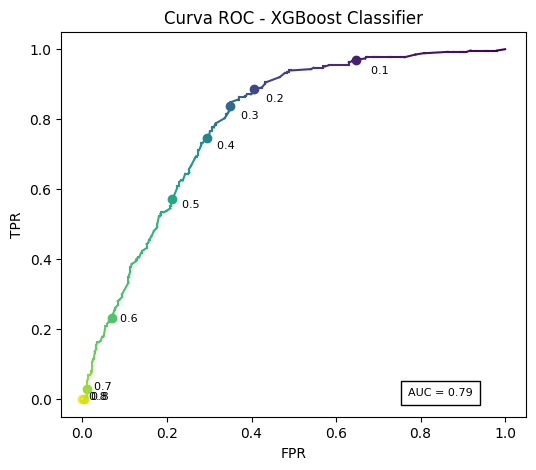

In [89]:
fig, ax = plt.subplots(ncols=1, figsize=(6,5))
y_probs = grid_search.predict_proba(X_test)[:,1]
complete_plot_roc(y_test, y_probs, ax)
plt.title("Curva ROC - XGBoost Classifier")
plt.show()

Percebemos que para o modelo XGBoost, o limiar de classificação entre 0.2 e 0.3 corresponde ao valor que melhor classifica o conjunto de teste mantendo um equilíbrio entre VP (Verdadeiros Positivos) e FP (Falsos Positivos)

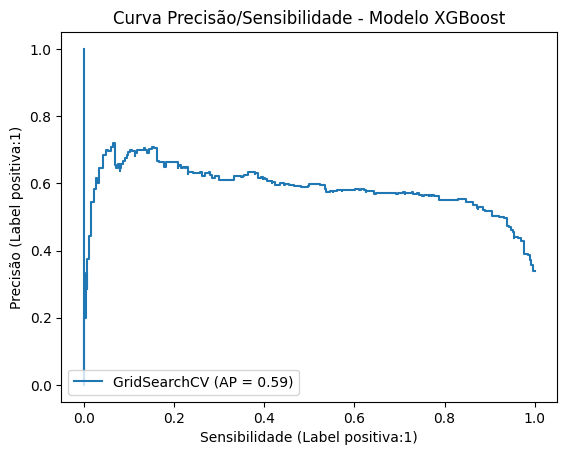

In [90]:
PrecisionRecallDisplay.from_estimator(
  grid_search, X_test, y_test
)
plt.ylabel("Precisão (Label positiva:1)")
plt.xlabel("Sensibilidade (Label positiva:1)")
plt.title("Curva Precisão/Sensibilidade - Modelo XGBoost")
plt.show()

Classificando o conjunto de teste usando o XGBoost com um limiar de 0.3

In [91]:
y_pred_xgboost = (y_probs > 0.3).astype(int)

#Avaliando o modelo
xgb_precision = precision_score(y_true=y_test, y_pred=y_pred_xgboost)
xgb_recall =  recall_score(y_test, y_pred_xgboost)
xgb_f1 = f1_score(y_test, y_pred_xgboost)
xgb_balanced_accuracy = balanced_accuracy_score(y_test, y_pred_xgboost)

print("XGBoost - Limiar de 30%")
print("Acurácia Balanceada", xgb_balanced_accuracy)
print("Precisão:", xgb_precision)
print("Sensibilidade:", xgb_recall)
print("Especificidade", especificidade(y_pred_xgboost, y_test))
print("F1 Score", xgb_f1)

XGBoost - Limiar de 30%
Acurácia Balanceada 0.7406482136540502
Precisão: 0.550251256281407
Sensibilidade: 0.8295454545454546
Especificidade 0.6517509727626459
F1 Score 0.661631419939577


In [92]:
xg_boost_report = get_classification_report(y_test, y_pred_xgboost)
xg_boost_report

,precision,recall,f1-score,support
0,0.881579,0.651751,0.749441,514.000000
weighted avg,0.769149,0.712082,0.719644,778.000000
accuracy,0.712082,0.712082,0.712082,0.712082
macro avg,0.715915,0.740648,0.705536,778.000000
1,0.550251,0.829545,0.661631,264.000000


### **Comparação dos Modelos Ajustados**

In [93]:
print("Acurácia Balanceada - Regressão Logística", round(balanced_accuracy_lr, 2))
print("Acurácia Balanceada - Regressão Logística Balanceada", round(balanced_accuracy_blr, 2))
print("Acurácia Balanceada - Floresta Aleatória", round(rf_balanced_accuracy, 2))
print("Acurácia Balanceada - Floresta Aleatória Balanceada", round(brf_balanced_accuracy, 2))
print("Acurácia Balanceada - Gradient Boosting", round(xgb_balanced_accuracy, 2))

comparison_report = pd.concat([logistic_regression_report, balanced_logistic_regression_report, random_forest_report, balanced_random_forest_report, xg_boost_report], axis=1,
                              keys=['Regressão Logística','Regressão Logística Balanceada', 'Floresta Aleatória', 'Floresta Aleatória Balanceada' , 'XGBoosting'])
comparison_report

Acurácia Balanceada - Regressão Logística 0.76
Acurácia Balanceada - Regressão Logística Balanceada 0.77
Acurácia Balanceada - Floresta Aleatória 0.72
Acurácia Balanceada - Floresta Aleatória Balanceada 0.73
Acurácia Balanceada - Gradient Boosting 0.74


Regressão Logística                                  \
                       precision    recall  f1-score     support   
0                       0.910082  0.649805  0.758229  514.000000   
weighted avg            0.791981  0.726221  0.733192  778.000000   
accuracy                0.726221  0.726221  0.726221    0.726221   
macro avg               0.736063  0.762403  0.721337  778.000000   
1                       0.562044  0.875000  0.684444  264.000000   

             Regressão Logística Balanceada                                  \
                                  precision    recall  f1-score     support   
0                                  0.919220  0.642023  0.756014  514.000000   
weighted avg                       0.797617  0.726221  0.732982  778.000000   
accuracy                           0.726221  0.726221  0.726221    0.726221   
macro avg                          0.740040  0.766087  0.722077  778.000000   
1                                  0.560859  0.890152  0.688141  264.000000   

             Floresta Aleatória                                  \
                      precision    recall  f1-score     support   
0                      0.886628  0.593385  0.710956  514.000000   
weighted avg           0.761688  0.681234  0.688473  778.000000   
accuracy               0.681234  0.681234  0.681234    0.681234   
macro avg              0.702531  0.722829  0.677827  778.000000   
1                      0.518433  0.852273  0.644699  264.000000   

             Floresta Aleatória Balanceada                                  \
                                 precision    recall  f1-score     support   
0                                 0.916667  0.556420  0.692494  514.000000   
weighted avg                      0.778919  0.673522  0.678772  778.000000   
accuracy                          0.673522  0.673522  0.673522    0.673522   
macro avg                         0.713698  0.728968  0.672274  778.000000   
1                                 0.510730  0.901515  0.652055  264.000000   

             XGBoosting                                  
              precision    recall  f1-score     support  
0              0.881579  0.651751  0.749441  514.000000  
weighted avg   0.769149  0.712082  0.719644  778.000000  
accuracy       0.712082  0.712082  0.712082    0.712082  
macro avg      0.715915  0.740648  0.705536  778.000000  
1              0.550251  0.829545  0.661631  264.000000

Vamos agregar essas informações emuma tabela final para facilitar a visualização

In [105]:
line_1 = comparison_report.iloc[0]
line_5 = comparison_report.iloc[4]

df_1 = pd.DataFrame(line_1)
df_2 = pd.DataFrame(line_5)

tabela_final = df_1.join(df_2)

In [106]:
tabela_final

0           1
Regressão Logística            precision    0.910082    0.562044
                               recall       0.649805    0.875000
                               f1-score     0.758229    0.684444
                               support    514.000000  264.000000
Regressão Logística Balanceada precision    0.919220    0.560859
                               recall       0.642023    0.890152
                               f1-score     0.756014    0.688141
                               support    514.000000  264.000000
Floresta Aleatória             precision    0.886628    0.518433
                               recall       0.593385    0.852273
                               f1-score     0.710956    0.644699
                               support    514.000000  264.000000
Floresta Aleatória Balanceada  precision    0.916667    0.510730
                               recall       0.556420    0.901515
                               f1-score     0.692494    0.652055
                               support    514.000000  264.000000
XGBoosting                     precision    0.881579    0.550251
                               recall       0.651751    0.829545
                               f1-score     0.749441    0.661631
                               support    514.000000  264.000000

# Detecção de observações atípicas utilizando aprendizado de máquina

Durante a tarefa de classificação, pode ser de interesse do negócio separar as observações mais difíceis de classificar para uma inspeção mais cuidadosa. Nesse cenário, o método BCOPS (balanced and conformal optimized prediction sets), proposto por Guan & Tibshirani (2022), pode ser uma solução prática, uma vez que ele utiliza predição conformal para detecção observações que se distanciam das classes apresentadas durante o treino. Para isso, o método cria conjuntos de predição para as observações do conjunto de teste que possuem as classes as quais a observação pode pertencer. Por exemplo, seja C(x) o conjunto de predição da observação x:

* se C(x) = {0, 1}, consideramos que x pode pertencer às classes 0 ou 1;
* se C(x) = {1}, consideramos que x pode pertencer à classe 1;
* se C(x) = {}, consideramos que x é uma observação atípica.


In [94]:
prediction_conformal = pb.BCOPS(RandomForestClassifier, np.array(X_train), y_train, np.array(X_test))

A matriz de confusão abaixo indica a portcentagem de observações do conjunto de teste que tiveram uma classe ou outra inclusa no seu conjunto de predição. Podemos notar que a maioria das observações possui as duas classes inclusas, indicando uma dificuldade em separar as classes.

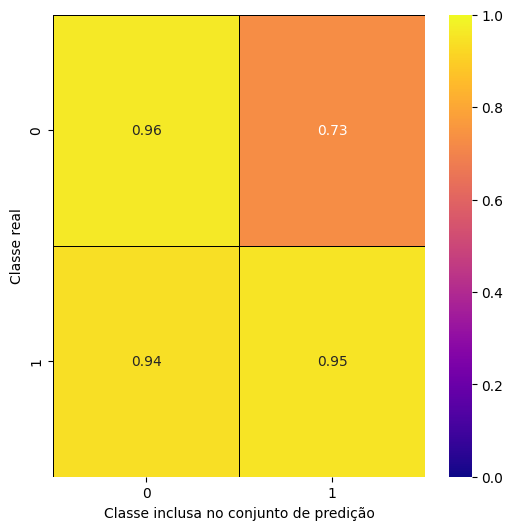

In [95]:
labels = np.unique(y_train)
evaluation = pb.evaluate_conformal(prediction_conformal, y_test, labels)
plt.figure(figsize=(6, 6))
sns.heatmap(evaluation, vmin=0, vmax=1, cmap="plasma", annot=True, linewidths=0.5, linecolor="black")
plt.ylabel('Classe real')
plt.xlabel('Classe inclusa no conjunto de predição')
plt.show()

In [96]:
y_pred = pb.prediction_sets(prediction_conformal, labels)

n_outliers = 0
for i in y_pred:
  n_outliers += (len(i)==0)

print('Tamanho do conjunto de teste:', prediction_conformal.shape[0])
print('Observações atípicas detectadas:', n_outliers)

Tamanho do conjunto de teste: 778
Observações atípicas detectadas: 10


No conjunto de 778 observações utilizando para testar os dados, 8 foram consideradas como observações atípicas e podem ser separadas para uma inspeção mais minuciosa.

# 4. Conclusão

## Análise Exploratória

A partir das análises exploratórias, pudemos identificar características de interesse no conjunto de dados. Visando o interesse da companhias de seguros, notamos que o segmento de cliente que apresenta a maior conversão de compras do seguro completo é o de mulheres no ambiente urbano. Além disso, as campanhas da empresa devem considerar que a idade é a variável com maior desvio-padrão, indicando a necessidade de segmentação para atingir todas as faixas etárias de maneira eficiente. Deve ser considerando ainda que os clientes são em sua grande maioria proprietários dos veículos. Por fim, considerando que a maior parte dos clientes nesses conjunto de dados são homens ($75.25\%$), é de proveito da companhia de seguros a elaboração de planos de ação que visem aumentar a proporção de compras de seguro completo dentro desse segmento.

## Agrupamentos

As técnicas de agrupamento indicaram que as variáveis $MEN$, $URBAN$ e $SENIORITY$ são as principais responsáveis pela divisão dos grupos.

Os grupos em que houve o maior acionamento dos seguros, como por exemplo na divisão pelo DBScan foram os grupos formados por mulheres que trafegam tanto em ambiente rural quanto urbano, com uma idade média de 42 anos e uma senioridade média de 9 anos.

Adicionamos ainda um algoritmo que utiliza predição conformal para detectar observações que se distânciam das classes apresentadas. Esse tipo de método pode oferecer uma maior segurança às predições feitas uma vez que permite separar essas observações atípicas para uma análise mais minuciosa.

## Modelagem

Iniciamos o processo de modelagem e, nossos ajustes refletem os indicativos observados nos agrupamentos.

Ou seja, os coeficientes de regressão tendem a apresentar maiores valores para os níveis, Mulher; trafegar em ambiente urbano e ter uma maior senioridade.
Desse modo, ao menos a partir do modelo logístico ajustado, sabemos que mulheres que trafegam em ambiente urbano e possuem uma maior senioridade, tem maiores chances de pertaencerem à classe positiva.

Também ajustamos um modelo baseado em árvore que apresentou um desempenho, semelhante, mas um pouco inferior à regressão logística clássica. Apresentamos também técnicas de Boosting.

O limiar de classificação para o modelo logístico que corresponde ao ponto de máximo da nossa curva ROC, foi de 0.29. Nós, sabemos que esse pode ser um limiar bem baixo, a depender do contexto do negócio.

Dito isso, enfatizamos que o processo de Ciência de Dados deve se iniciar e terminar sempre a apartir da definição do objetivo do negócio/análise buscando sempre entender o contexto presente. De acordo com o custo de um FN, por exemplo, o limiar pode ser ajustado de modo a favorecer mais a sensibilidade, especificidade ou a precisão do modelo.

Por fim, recomendaríamos o uso do modelo de Regressão Logística, como modelo final para classificação dos clientes mais propensos à ativação do seguro completo. Em relação ao balanceamento, dado que não estamos em um cenário de produção e dada as baixas diferenças entre o modelo usual e sua versão balanceada, não podemos assegurar a superioridade do modelo balanceado.

## Sugestões para a continuação da análise

Possíveis abordagens para a continuação deste trabalho seriam ajustar outras famílias de modelos bayesianos visando avaliar o impacto da incorporação de informação à priori nos modelos criados.

# Referências

* Bazán, J. L., Torres-Avilés, F., Suzuki, A. and Louzada, F. (2017). Power and reversal power links for binary regressions: An application for motor insurance policyholders. Applied Stochastic Models in Business and Industry 33, 22–34.
* Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020).
* J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.
* McKinney W, et al. Data structures for statistical computing in python. In: Proceedings of the 9th Python in Science Conference. 2010. p. 51–6.
*  Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021.
* Pedregosa et al., Scikit-learn: Machine Learning in Python, JMLR 12, pp. 2825-2830, 2011.
* Seabold, Skipper, and Josef Perktold. “statsmodels: Econometric and statistical modeling with python.” Proceedings of the 9th Python in Science Conference. 2010.
* Riddell, A., Hartikainen, A., & Carter, M. (2021). PyStan (3.0.0). https://pypi.org/project/pystan
* Guan, L. & Tibshirani, R. (2022). Prediction and outlier detection in classiﬁcation problems. Journal of the Royal Statistical Society: Series B (Statistical Methodology), 84:524–546.
* Chao Chen, Andy Liaw, Leo Breiman, and others. Using random forest to learn imbalanced data. University of California, Berkeley, 110(1-12):24, 2004.
* Breiman, L. (2001). Random forest. Machine Learning, 45, 5–32.
* Imbalanced Binary Classification - A survey with code By Experian LatAm DataLab https://pibieta.github.io/imbalanced_learning/notebooks/Introduction.html
* Reproducible Machine Learning for Credit Card Fraud detection - Practical handbook - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Foreword.html